In [15]:
import sys
sys.path.insert(0, r'..\Library\\')

import Perceptron
import AdalineGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import importlib
importlib.reload(Perceptron)
importlib.reload(AdalineGD)

<module 'AdalineGD' from '..\\Library\\AdalineGD.py'>

# Import the Iris dataset

Read the data from the csv file.

In [3]:
df = pd.read_csv('iris.data', header=None)

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Change the target value (-1 for Iris setosa, +1 for the other)

In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [6]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Extract the sepal length and petal length

In [7]:
X = df.iloc[0:100, [0, 2]].values

In [8]:
X[0:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

# Plot the Data

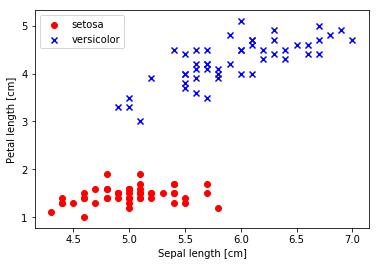

In [9]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker = 'o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Simple Perceptron

Create the perceptron instance

In [10]:
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)

Perceptron Initialization...


Train the perceptron

In [11]:
ppn.fit(X, y)

Print the errors

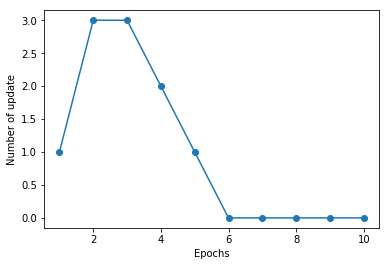

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

The model converge in 6 cycles.

# Plot the results

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution=0.02):
    # Setup marker and colors
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    

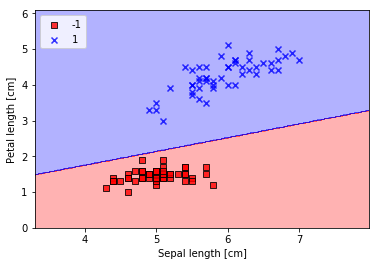

In [14]:
plot_decision_region(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Descent Gradient with AdalineGD

Create two instance of perceptron. One with a learn rate of 0.01 and the other 0.0001

In [34]:
Ada1 = AdalineGD.AdalineGD(eta=0.01, n_iter=10)
Ada2 = AdalineGD.AdalineGD(eta=0.0001, n_iter=10)

AdalineGD Initialization...
AdalineGD Initialization...


Train the neural network

In [35]:
Ada1.fit(X,y)
Ada2.fit(X,y)

Plot the cost

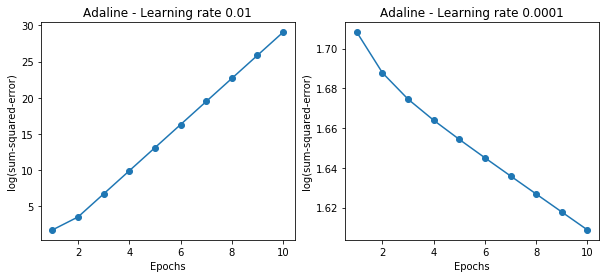

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(range(1, len(Ada1.cost_) + 1), np.log10(Ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(Ada2.cost_) + 1), np.log10(Ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()